<a href="https://colab.research.google.com/github/raohxxx/Telecom-2-challenge/blob/main/telecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1> Challenge Telecom X parte 2</H1>

## 1.-Importando los datos de Telecom x

## Extracion de datos.
### los datos se colocaron previamente en un repositorio de GitHub

In [1]:
import pandas as pd
url='https://github.com/raohxxx/Telecom-2-challenge/raw/refs/heads/main/datos_limpios3.csv'
df=pd.read_csv(url)

df.head()


,IDcliente,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,...,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL,Cuentas_Diarias
0,0002-ORFBO,No,Mujer,0,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Hombre,0,No,No,9,Si,Si,DSL,...,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Si,Hombre,0,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Si,Hombre,1,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Si,Mujer,1,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40,2.80


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IDcliente                7043 non-null   object 
 1   CHURN                    7043 non-null   object 
 2   GENERO_CLIENTE           7043 non-null   object 
 3   ADULTO_MAYOR             7043 non-null   int64  
 4   CON_PAREJA               7043 non-null   object 
 5   CLIENTE_CON_DEPENDIENTE  7043 non-null   object 
 6   ANTIGUEDAD_CLIENTE       7043 non-null   int64  
 7   SERVICIO_TELEFONO        7043 non-null   object 
 8   MULTIPLES_LINEAS         7043 non-null   object 
 9   S_INTERNET               7043 non-null   object 
 10  SEGURIDAD_ONLINE         7043 non-null   object 
 11  RESPALDO_ONLINE          7043 non-null   object 
 12  PROTECCION_DISPOSITIVOS  7043 non-null   object 
 13  SOPORTE_TECNICO          7043 non-null   object 
 14  TV_STREAMING            

In [3]:
df.isna().sum()

,0
IDcliente,0
CHURN,0
GENERO_CLIENTE,0
ADULTO_MAYOR,0
CON_PAREJA,0
CLIENTE_CON_DEPENDIENTE,0
ANTIGUEDAD_CLIENTE,0
SERVICIO_TELEFONO,0
MULTIPLES_LINEAS,0
S_INTERNET,0


##🛠️ Preparación de los Datos
##✔️ Eliminacion columnas no relevantes
### Se elimina IDcliente porque es una columna con informacion unica de cada cliente y que no aporta informacion a los modelos, tambies la de cuentas diarias porque fue creado dividiendo cargo mensual entre 30 por lo tanto esta correlacionada con cargo mensual

In [4]:
df=df.drop( columns=['IDcliente','Cuentas_Diarias'])
df.sample(10)

,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,SEGURIDAD_ONLINE,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
3666,Si,Mujer,0,No,No,4,Si,No,DSL,No,No,No,No,No,No,Month-to-month,Si,Mailed check,46.00,193.60
1184,No,Hombre,0,Si,Si,56,Si,Si,Fiber optic,Si,Si,Si,Si,Si,Si,Two year,No,Mailed check,115.85,6567.90
4990,No,Hombre,1,Si,No,29,Si,No,Fiber optic,Si,No,Si,No,No,Si,One year,No,Bank transfer (automatic),90.10,2656.70
4010,No,Mujer,0,Si,No,41,Si,No,Fiber optic,No,Si,Si,Si,No,No,One year,Si,Bank transfer (automatic),86.20,3339.05
1259,Si,Mujer,1,Si,No,40,No,No phone service,DSL,No,Si,No,No,Si,No,Month-to-month,Si,Electronic check,39.30,1637.40
2110,Si,Hombre,0,No,No,1,Si,No,Fiber optic,No,No,No,No,Si,Si,Month-to-month,Si,Electronic check,89.90,89.90
1850,Si,Mujer,1,No,No,30,Si,Si,Fiber optic,Si,Si,Si,No,No,No,Month-to-month,No,Credit card (automatic),91.70,2758.15
4109,No,Mujer,0,Si,Si,52,Si,Si,Fiber optic,No,No,Si,No,Si,Si,One year,No,Bank transfer (automatic),101.25,5301.10
5388,No,Mujer,0,No,No,48,Si,Si,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.00,1183.05
2094,No,Mujer,0,Si,No,25,Si,No,Fiber optic,No,No,No,Si,Si,Si,Month-to-month,Si,Electronic check,95.15,2395.70


## transformacion de columnas categoricas y cambios de valores
### De los datos se observan  que donde dice no_internet_service el cliente no tiene el servicio por lo cual podemos remplazar esos valores por no , sin que afecte los datos, adicionalmente a la hora de codificar se elimnan la creacion de varias columnas

In [5]:
columnas_a_corregir=['SEGURIDAD_ONLINE',	'RESPALDO_ONLINE',	'PROTECCION_DISPOSITIVOS',	'SOPORTE_TECNICO',	'TV_STREAMING',	'PELICULAS_STREAMING'	]

df_clean = df.copy()
for col in columnas_a_corregir:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')
df_clean.sample(10)

,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,SEGURIDAD_ONLINE,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
1869,No,Hombre,0,Si,No,43,Si,No,Fiber optic,Si,Si,Si,No,No,No,Month-to-month,Si,Credit card (automatic),86.10,3551.65
4380,No,Hombre,0,No,No,46,No,No phone service,DSL,Si,No,No,No,No,No,One year,Si,Bank transfer (automatic),30.75,1489.30
3867,Si,Hombre,0,No,Si,3,Si,Si,Fiber optic,No,No,Si,No,No,Si,Month-to-month,No,Electronic check,91.85,257.05
2900,No,Mujer,0,No,No,4,Si,Si,Fiber optic,No,No,No,Si,Si,Si,Month-to-month,Si,Mailed check,100.85,399.25
1300,No,Hombre,0,Si,Si,58,Si,No,Fiber optic,No,Si,No,No,Si,Si,Month-to-month,Si,Electronic check,92.85,5305.05
3575,No,Mujer,0,Si,No,3,Si,No,No,No,No,No,No,No,No,Month-to-month,Si,Mailed check,19.90,45.75
2583,No,Hombre,0,Si,Si,4,No,No phone service,DSL,Si,No,No,No,Si,No,Month-to-month,No,Credit card (automatic),38.55,156.10
3764,Si,Hombre,0,No,No,3,Si,Si,Fiber optic,No,No,Si,No,Si,Si,Month-to-month,Si,Bank transfer (automatic),101.55,298.35
1947,No,Mujer,0,Si,Si,37,Si,Si,Fiber optic,No,No,No,No,Si,Si,Month-to-month,Si,Electronic check,95.25,3314.15
6068,Si,Mujer,0,No,No,5,Si,Si,DSL,No,No,No,No,No,No,Month-to-month,Si,Mailed check,50.60,249.95


In [6]:
df_clean.shape

(7043, 20)

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CHURN                    7043 non-null   object 
 1   GENERO_CLIENTE           7043 non-null   object 
 2   ADULTO_MAYOR             7043 non-null   int64  
 3   CON_PAREJA               7043 non-null   object 
 4   CLIENTE_CON_DEPENDIENTE  7043 non-null   object 
 5   ANTIGUEDAD_CLIENTE       7043 non-null   int64  
 6   SERVICIO_TELEFONO        7043 non-null   object 
 7   MULTIPLES_LINEAS         7043 non-null   object 
 8   S_INTERNET               7043 non-null   object 
 9   SEGURIDAD_ONLINE         7043 non-null   object 
 10  RESPALDO_ONLINE          7043 non-null   object 
 11  PROTECCION_DISPOSITIVOS  7043 non-null   object 
 12  SOPORTE_TECNICO          7043 non-null   object 
 13  TV_STREAMING             7043 non-null   object 
 14  PELICULAS_STREAMING     

In [ ]:
columnas_categoricas=df.select_dtypes(include='object').columns
columnas_categoricas

Index(['CHURN', 'GENERO_CLIENTE', 'CON_PAREJA', 'CLIENTE_CON_DEPENDIENTE',
       'SERVICIO_TELEFONO', 'MULTIPLES_LINEAS', 'S_INTERNET',
       'SEGURIDAD_ONLINE', 'RESPALDO_ONLINE', 'PROTECCION_DISPOSITIVOS',
       'SOPORTE_TECNICO', 'TV_STREAMING', 'PELICULAS_STREAMING', 'CONTRATO',
       'BOLETA_ELECTRONICA', 'METODO_PAGO'],
      dtype='object')

In [11]:
#se cambia df_clean a df para simplicidad al escribir
df=pd.get_dummies(df_clean,drop_first=True)
pd.set_option('display.max_columns', None)
df

,ADULTO_MAYOR,ANTIGUEDAD_CLIENTE,CARGO_MENSUAL,CARGO_TOTAL,CHURN_Si,GENERO_CLIENTE_Mujer,CON_PAREJA_Si,CLIENTE_CON_DEPENDIENTE_Si,SERVICIO_TELEFONO_Si,MULTIPLES_LINEAS_No phone service,MULTIPLES_LINEAS_Si,S_INTERNET_Fiber optic,S_INTERNET_No,SEGURIDAD_ONLINE_Si,RESPALDO_ONLINE_Si,PROTECCION_DISPOSITIVOS_Si,SOPORTE_TECNICO_Si,TV_STREAMING_Si,PELICULAS_STREAMING_Si,CONTRATO_One year,CONTRATO_Two year,BOLETA_ELECTRONICA_Si,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check
0,0,9,65.60,593.30,False,True,True,True,True,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,True,False,True,False,True,False,False,True,False,False,True,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,True,True,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,1873.70,True,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,92.75,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,4627.65,False,False,True,True,True,False,False,False,False,True,False,True,True,False,True,False,True,False,False,False,True


## Hacer matriz de  correlacion

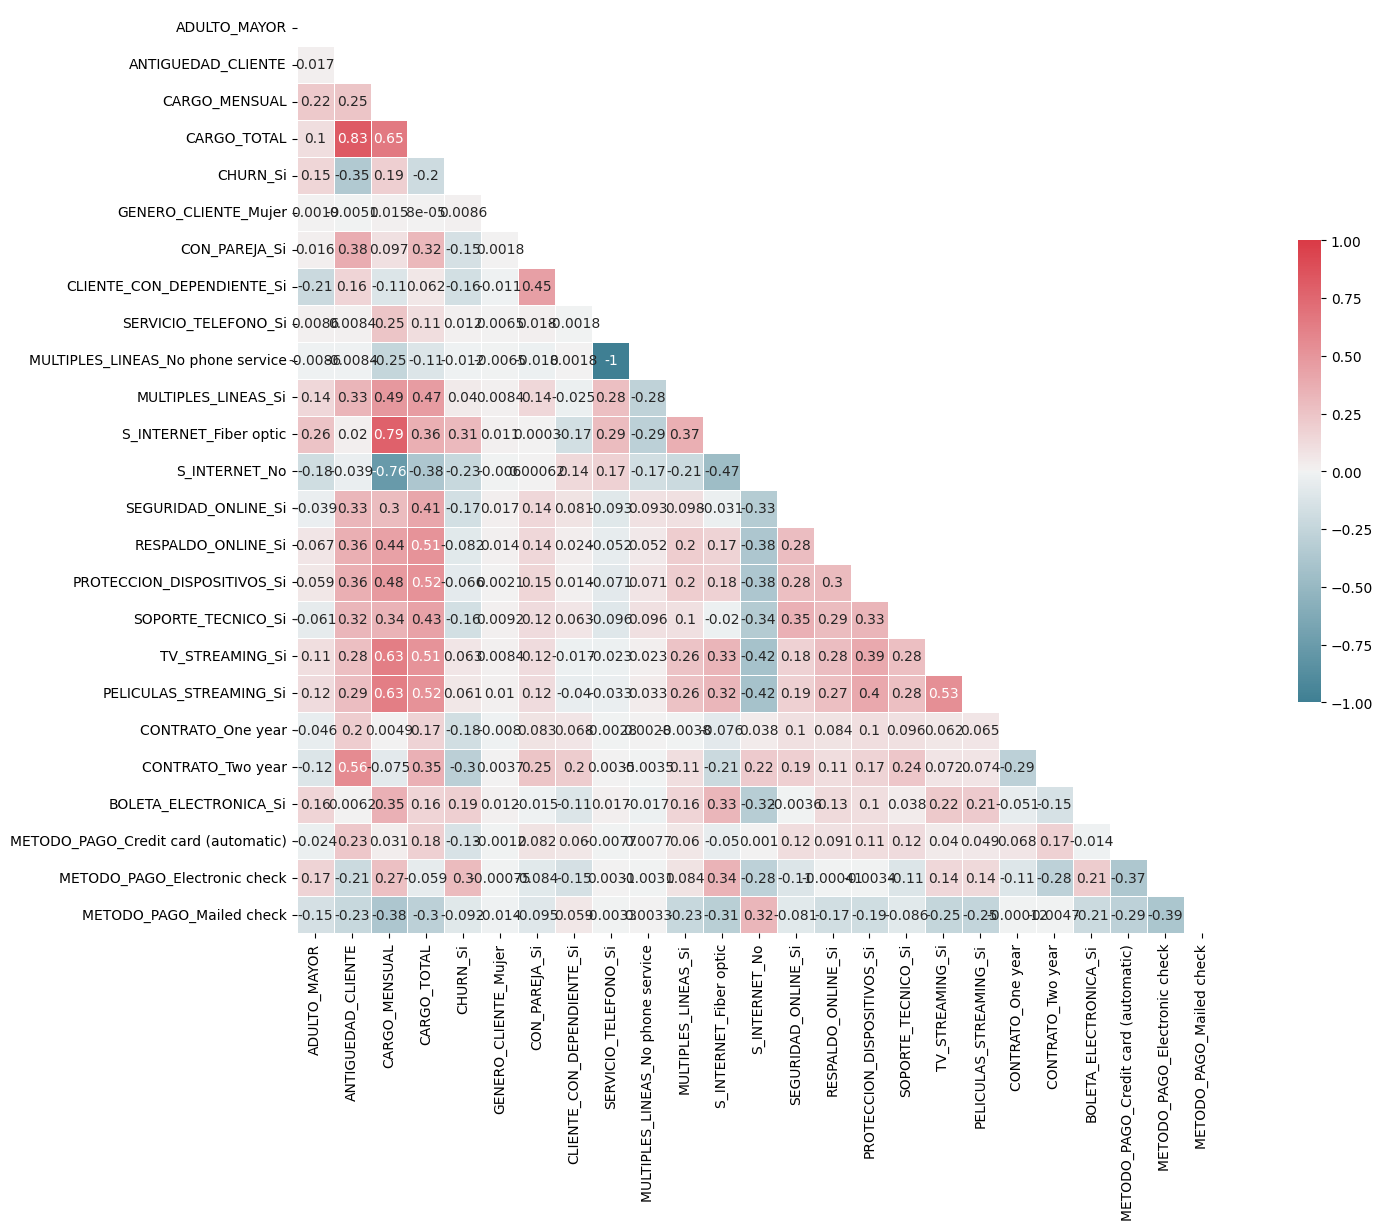

In [10]:
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correlación
corr = df.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(20, 12))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5}, annot_kws={"size": 10})

# Mostrar el mapa de calor (heatmap)
plt.show()

In [12]:
correlation_matrix = df.corr()
print("Correlation with CHURN:")
display(correlation_matrix['CHURN_Si'].sort_values(ascending=True))

Correlation with CHURN:


,CHURN_Si
ANTIGUEDAD_CLIENTE,-0.352229
CONTRATO_Two year,-0.302253
S_INTERNET_No,-0.227890
CARGO_TOTAL,-0.198324
CONTRATO_One year,-0.177820
SEGURIDAD_ONLINE_Si,-0.171226
SOPORTE_TECNICO_Si,-0.164674
CLIENTE_CON_DEPENDIENTE_Si,-0.164221
CON_PAREJA_Si,-0.150448
METODO_PAGO_Credit card (automatic),-0.134302


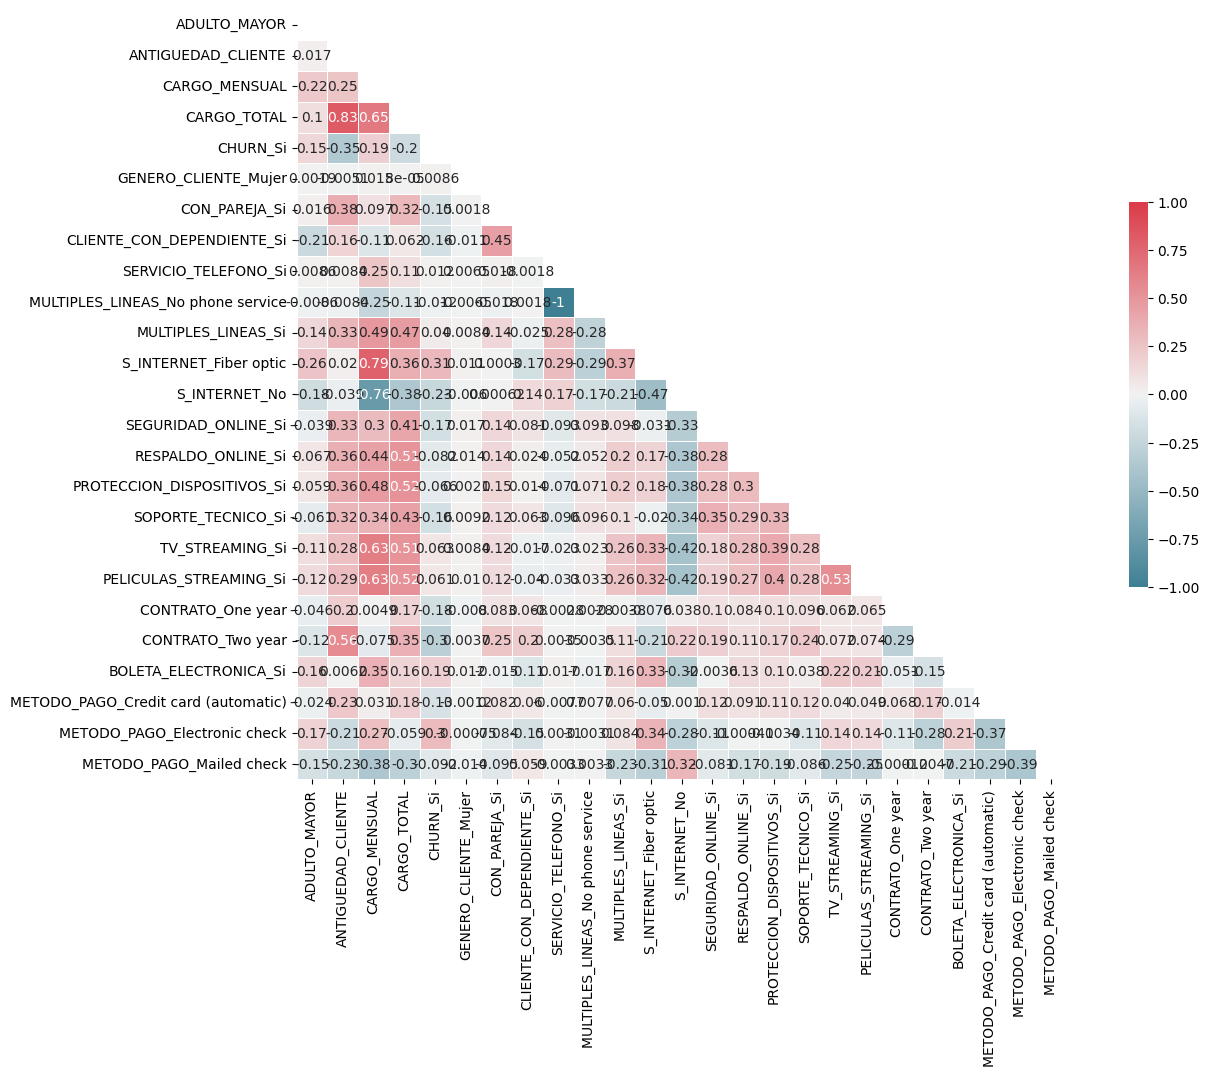

In [13]:
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo datos



# Correlación
corr = df.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(16, 10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

####Basándonos en el mapa de calor de correlación y los valores de correlación con 'CHURN_Si', podemos sacar algunas conclusiones:

Variables con fuerte correlación positiva con CHURN: 'S_INTERNET_Fiber optic' (0.308) y 'METODO_PAGO_Electronic check' (0.302) tienen la correlación positiva más fuerte con CHURN, lo que sugiere que los clientes con servicio de internet de fibra óptica y aquellos que utilizan cheques electrónicos tienen más probabilidades de abandonar.
Variables con fuerte correlación negativa con CHURN: 'ANTIGUEDAD_CLIENTE' (-0.352) y 'CONTRATO_Two year' (-0.302) tienen la correlación negativa más fuerte con CHURN, lo que indica que los clientes a largo plazo y aquellos con contratos de dos años tienen menos probabilidades de abandonar.
Variables con baja correlación: Las variables con valores de correlación absoluta inferiores a 0.05 (por ejemplo, 'GENERO_CLIENTE_Mujer', 'SERVICIO_TELEFONO_Si', 'MULTIPLES_LINEAS_No phone service') tienen muy poca relación lineal con CHURN y podrían ser consideradas para su eliminación, como se sugiere en la celda de texto G-QDVvtEgEW9.
Es importante recordar que la correlación no implica causalidad, pero estos conocimientos pueden ser útiles para construir un modelo predictivo de abandono.


##Aplicando Filtro a mapa de calor

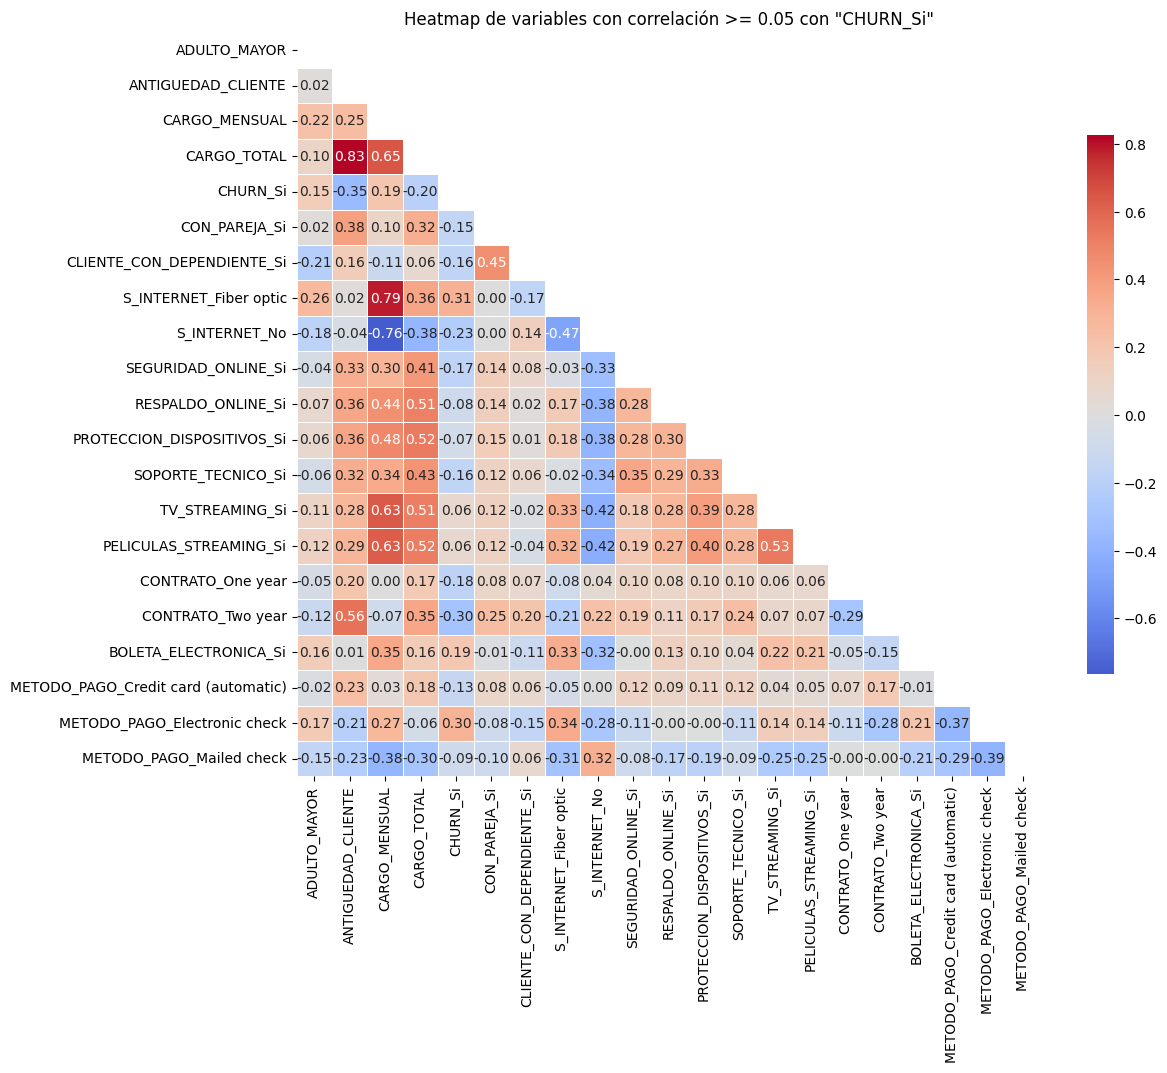

In [14]:
# Definir la variable objetivo
target_var = 'CHURN_Si'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.05  # You can adjust this threshold as needed

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

##Valores de correlacion de acuerdo al CHURN_SI

In [15]:
correlation_matrix = df.corr()
print("Correlation with CHURN:")
display(correlation_matrix['CHURN_Si'].sort_values(ascending=True))

Correlation with CHURN:


,CHURN_Si
ANTIGUEDAD_CLIENTE,-0.352229
CONTRATO_Two year,-0.302253
S_INTERNET_No,-0.227890
CARGO_TOTAL,-0.198324
CONTRATO_One year,-0.177820
SEGURIDAD_ONLINE_Si,-0.171226
SOPORTE_TECNICO_Si,-0.164674
CLIENTE_CON_DEPENDIENTE_Si,-0.164221
CON_PAREJA_Si,-0.150448
METODO_PAGO_Credit card (automatic),-0.134302


In [22]:
columnas_baja_correlacion = ['MULTIPLES_LINEAS_No phone service', 'GENERO_CLIENTE_Mujer', 'SERVICIO_TELEFONO_Si', 'MULTIPLES_LINEAS_Si']
print(columnas_baja_correlacion)

['MULTIPLES_LINEAS_No phone service', 'GENERO_CLIENTE_Mujer', 'SERVICIO_TELEFONO_Si', 'MULTIPLES_LINEAS_Si']


In [27]:
df=df.drop(columns=columnas_baja_correlacion)

## Proporcion de Churn

In [ ]:
df.CHURN_Si.value_counts(normalize=True)

,proportion
CHURN_Si,
False,0.73463
True,0.26537


In [ ]:
X=df.drop(columns=['CHURN_Si'])
y=df['CHURN_Si']
display(X.head())
display(y.head())

,ADULTO_MAYOR,ANTIGUEDAD_CLIENTE,CARGO_MENSUAL,CARGO_TOTAL,GENERO_CLIENTE_Mujer,CON_PAREJA_Si,CLIENTE_CON_DEPENDIENTE_Si,SERVICIO_TELEFONO_Si,MULTIPLES_LINEAS_No phone service,MULTIPLES_LINEAS_Si,...,TV_STREAMING_No internet service,TV_STREAMING_Si,PELICULAS_STREAMING_No internet service,PELICULAS_STREAMING_Si,CONTRATO_One year,CONTRATO_Two year,BOLETA_ELECTRONICA_Si,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check
0,0,9,65.6,593.30,True,True,True,True,False,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,False,True,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,True,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True


,CHURN_Si
0,False
1,False
2,True
3,True
4,True


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

columnas = X.columns
columnas_numericas = ['ANTIGUEDAD_CLIENTE','CARGO_MENSUAL', 'CARGO_TOTAL']
columnasS=columnas.drop(columnas_numericas)
display(columnasS)

Index(['ADULTO_MAYOR', 'GENERO_CLIENTE_Mujer', 'CON_PAREJA_Si',
       'CLIENTE_CON_DEPENDIENTE_Si', 'SERVICIO_TELEFONO_Si',
       'MULTIPLES_LINEAS_No phone service', 'MULTIPLES_LINEAS_Si',
       'S_INTERNET_Fiber optic', 'S_INTERNET_No',
       'SEGURIDAD_ONLINE_No internet service', 'SEGURIDAD_ONLINE_Si',
       'RESPALDO_ONLINE_No internet service', 'RESPALDO_ONLINE_Si',
       'PROTECCION_DISPOSITIVOS_No internet service',
       'PROTECCION_DISPOSITIVOS_Si', 'SOPORTE_TECNICO_No internet service',
       'SOPORTE_TECNICO_Si', 'TV_STREAMING_No internet service',
       'TV_STREAMING_Si', 'PELICULAS_STREAMING_No internet service',
       'PELICULAS_STREAMING_Si', 'CONTRATO_One year', 'CONTRATO_Two year',
       'BOLETA_ELECTRONICA_Si', 'METODO_PAGO_Credit card (automatic)',
       'METODO_PAGO_Electronic check', 'METODO_PAGO_Mailed check'],
      dtype='object')

In [ ]:
one_hot = make_column_transformer((
    OneHotEncoder(categories='auto',dtype=int,
                  drop = 'if_binary'),
    columnasS),

    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [ ]:
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__ADULTO_MAYOR_1',
       'onehotencoder__GENERO_CLIENTE_Mujer_True',
       'onehotencoder__CON_PAREJA_Si_True',
       'onehotencoder__CLIENTE_CON_DEPENDIENTE_Si_True',
       'onehotencoder__SERVICIO_TELEFONO_Si_True',
       'onehotencoder__MULTIPLES_LINEAS_No phone service_True',
       'onehotencoder__MULTIPLES_LINEAS_Si_True',
       'onehotencoder__S_INTERNET_Fiber optic_True',
       'onehotencoder__S_INTERNET_No_True',
       'onehotencoder__SEGURIDAD_ONLINE_No internet service_True',
       'onehotencoder__SEGURIDAD_ONLINE_Si_True',
       'onehotencoder__RESPALDO_ONLINE_No internet service_True',
       'onehotencoder__RESPALDO_ONLINE_Si_True',
       'onehotencoder__PROTECCION_DISPOSITIVOS_No internet service_True',
       'onehotencoder__PROTECCION_DISPOSITIVOS_Si_True',
       'onehotencoder__SOPORTE_TECNICO_No internet service_True',
       'onehotencoder__SOPORTE_TECNICO_Si_True',
       'onehotencoder__TV_STREAMING_No internet service_True',
     

In [ ]:
X=pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))
#X=pd.concat([X,df[columnas_numericas]], axis=1)
#X = X.astype(int)


In [ ]:

X.columns

Index(['onehotencoder__ADULTO_MAYOR_1',
       'onehotencoder__GENERO_CLIENTE_Mujer_True',
       'onehotencoder__CON_PAREJA_Si_True',
       'onehotencoder__CLIENTE_CON_DEPENDIENTE_Si_True',
       'onehotencoder__SERVICIO_TELEFONO_Si_True',
       'onehotencoder__MULTIPLES_LINEAS_No phone service_True',
       'onehotencoder__MULTIPLES_LINEAS_Si_True',
       'onehotencoder__S_INTERNET_Fiber optic_True',
       'onehotencoder__S_INTERNET_No_True',
       'onehotencoder__SEGURIDAD_ONLINE_No internet service_True',
       'onehotencoder__SEGURIDAD_ONLINE_Si_True',
       'onehotencoder__RESPALDO_ONLINE_No internet service_True',
       'onehotencoder__RESPALDO_ONLINE_Si_True',
       'onehotencoder__PROTECCION_DISPOSITIVOS_No internet service_True',
       'onehotencoder__PROTECCION_DISPOSITIVOS_Si_True',
       'onehotencoder__SOPORTE_TECNICO_No internet service_True',
       'onehotencoder__SOPORTE_TECNICO_Si_True',
       'onehotencoder__TV_STREAMING_No internet service_True',
     

In [ ]:
X.shape

(7043, 30)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#y=pd.Series(y)
#y.head()
y

array([0, 0, 1, ..., 0, 0, 0])

## Separacion de datos

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)

## Normalizar datos para poder usar en otros algoritmos

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalizacion=MinMaxScaler()
X_norma_train=normalizacion.fit_transform(X_train)
X_norma_test=normalizacion.fit_transform(X_test)

'X_norma_train = pd.DataFrame(X_norma, columns = X.columns)\ndisplay(X_norma.head())'

In [ ]:

#X = X.astype(int)


# Crear modelo baseline Dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()
dummy.fit(X_norma_train, y_train)

dummy.score(X_norma_test, y_test)

0.7348097671777399

#Modelo arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo_arbol = DecisionTreeClassifier(random_state =5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [ ]:
modelo_arbol.predict(X_test)


array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
modelo_arbol.score(X_test, y_test)

0.7291311754684838

In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth = 3, random_state =5)
modelo_arbol.fit(X_train, y_train)
modelo_arbol.score(X_test, y_test)

0.7984099943214082

In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth = 6, random_state =5)
modelo_arbol.fit(X_train, y_train)
modelo_arbol.score(X_test, y_test)

0.7967064168086314

##Modelo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_norma_train, y_train)

KNeighborsClassifier()

In [ ]:
#X_test_normalizado = normalizacion.transform(X_test)

In [ ]:
knn.score(X_norma_test, y_test)

0.7756956274843839

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model = RandomForestClassifier(random_state=5)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [ ]:
accuracy = random_forest_model.score(X_test, y_test)

In [ ]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud modelo_arbol: {modelo_arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_norma_test, y_test)}')
print(f'Exactitud Random Forest: {accuracy}')

Exactitud Dummy: 0.7348097671777399
Exactitud modelo_arbol: 0.7308347529812607
Exactitud KNN: 0.7756956274843839
Exactitud Random Forest: 0.794434980124929


**Reasoning**:
Initialize and train the Random Forest Classifier.



Exactitud Random Forest: 0.794434980124929


## Summary:

### Data Analysis Key Findings

*   A Random Forest model was successfully created and trained.
*   The trained Random Forest model achieved an accuracy of approximately 0.7944 on the test dataset.

### Insights or Next Steps

*   Compare the performance of the Random Forest model with other models (e.g., Logistic Regression, Decision Tree) to determine the best model for the dataset.
*   Consider hyperparameter tuning for the Random Forest model to potentially improve its performance.
